In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from helper_functions import test_bot
from test_bots import play_bots

In [10]:
from bot_random import RandomBot
from mcts_bot import MCTSBot
from bot_humanlike import HumanLikeBot
from ppo_wrapper import PPOBot
from bot_dqn import DQNBot
bots = [DQNBot,PPOBot, RandomBot, HumanLikeBot]

In [12]:
bot_test_dict = {bot.__name__: bot for bot in bots}
for bot in bots:
    n = 100
    if bot == MCTSBot:
        n = 10
    print(bot.__name__)
    total_moves, mean, median, max_, min_, std, avg_hits_at_move, avg_moves_for_hit = test_bot(Bot=bot, n=n)
    
    bot_test_dict[bot.__name__] = {
        "total_moves": total_moves,
        "mean": mean,
        "median": median,
        "max": max_,
        "min": min_,
        "std": std,
        "avg_hits_at_move": avg_hits_at_move,
        "avg_moves_for_hit": avg_moves_for_hit
    } 
    
    print("Mean", bot_test_dict[bot.__name__]["mean"])
    print("Median", bot_test_dict[bot.__name__]["median"])
    print("Max", bot_test_dict[bot.__name__]["max"])
    print("Min", bot_test_dict[bot.__name__]["min"])
    print("Std", bot_test_dict[bot.__name__]["std"])
    print("-----------------")

DQNBot


100%|██████████| 100/100 [00:23<00:00,  4.32it/s]


Mean 93.02
Median 96.0
Max 100
Min 58
Std 8.99330862363791
-----------------
PPOBot


  0%|          | 0/100 [00:00<?, ?it/s]/Users/user/Documents_stuff/Ashoka/monsoon24-courses/AI/project/final-project-bot-tleship/torch_ppo_stuff/src/ppo/PPO.py:262: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues re

Mean 62.53
Median 61.5
Max 98
Min 32
Std 14.642714912201221
-----------------
RandomBot


100%|██████████| 100/100 [00:00<00:00, 383.07it/s]


Mean 95.19
Median 96.0
Max 100
Min 60
Std 5.5654200200883315
-----------------
HumanLikeBot


100%|██████████| 100/100 [00:00<00:00, 604.24it/s]

Mean 77.47
Median 80.5
Max 100
Min 43
Std 13.055615649979899
-----------------


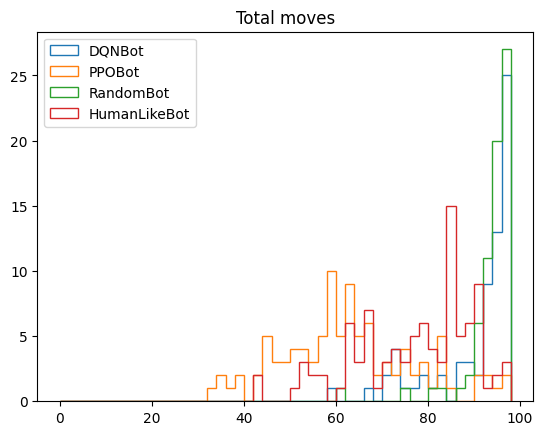

In [23]:
for bot in bots:
    plt.hist(bot_test_dict[bot.__name__]["total_moves"], bins=range(0, 100, 2), alpha=1, label=bot.__name__, histtype='step')
    plt.title("Total moves")
    plt.legend()

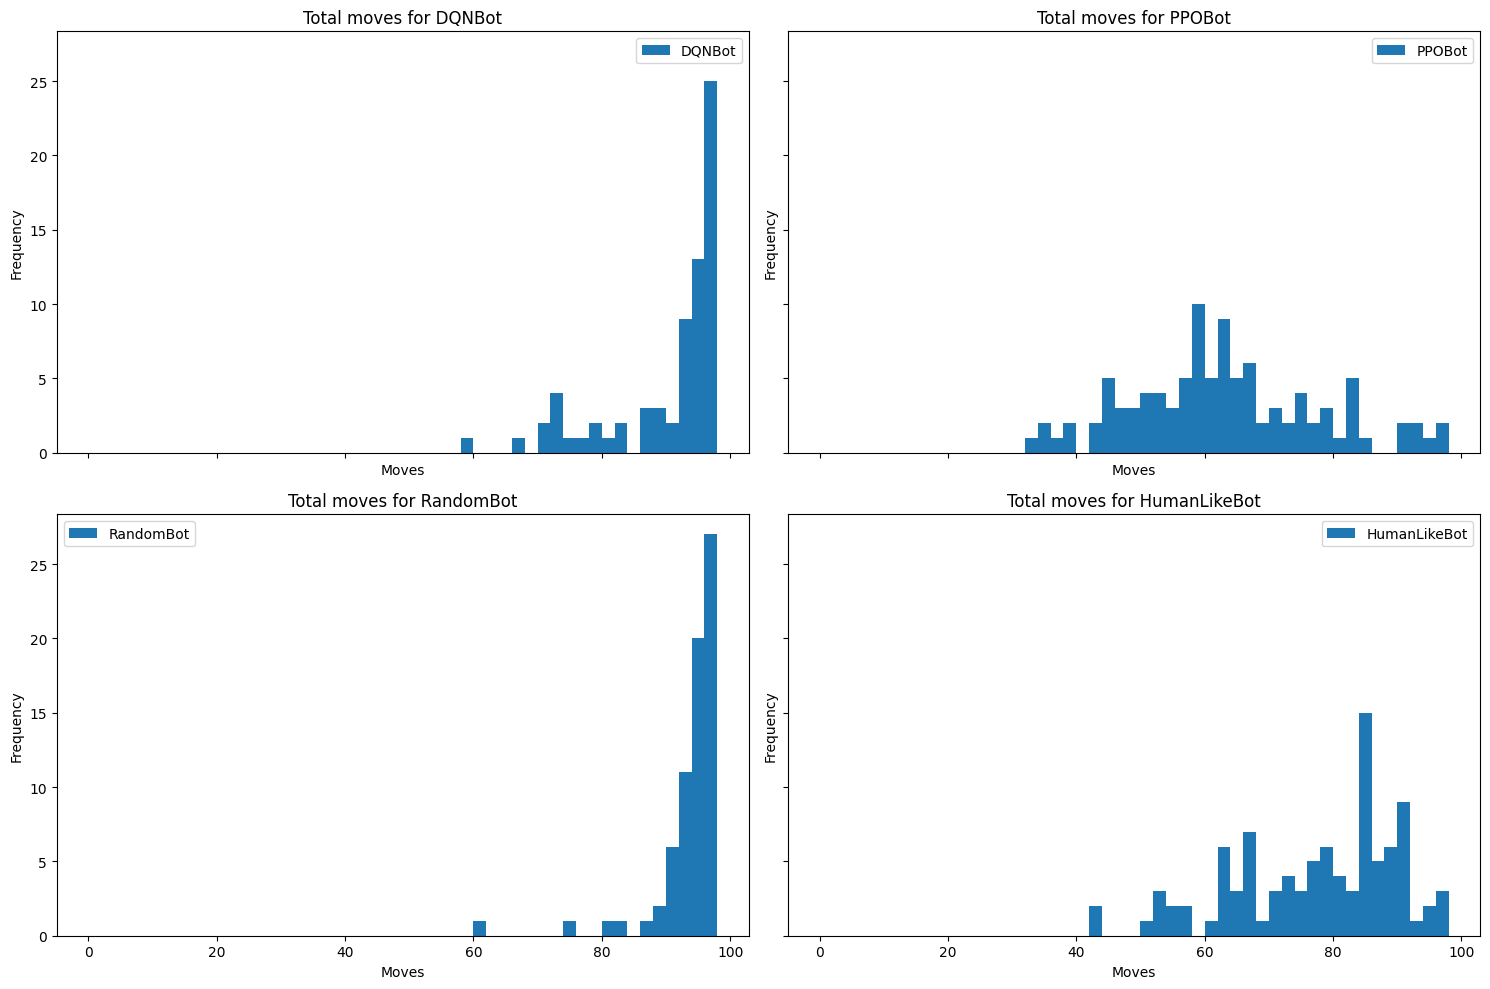

In [28]:
import matplotlib.pyplot as plt

# Determine the number of bots
num_bots = len(bots)

# Calculate the number of rows needed (two plots per row)
num_rows = (num_bots + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows), sharex=True, sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each bot's histogram in a separate subplot
for i, bot in enumerate(bots):
    ax = axes[i]
    ax.hist(bot_test_dict[bot.__name__]["total_moves"], bins=range(0, 100, 2), alpha=1, label=bot.__name__, histtype='bar')
    ax.set_title(f"Total moves for {bot.__name__}")
    ax.legend()
    ax.set_xlabel("Moves")
    ax.set_ylabel("Frequency")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig("total_moves_histograms.png")

# Display the figure
plt.show()

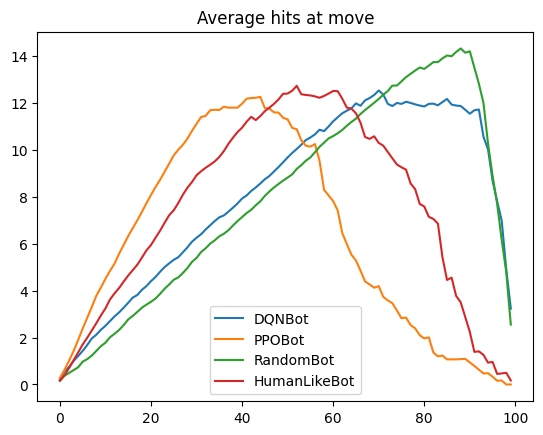

In [14]:
for bot in bots:
    plt.plot(bot_test_dict[bot.__name__]["avg_hits_at_move"], label=bot.__name__)
    plt.title("Average hits at move")
    plt.legend()

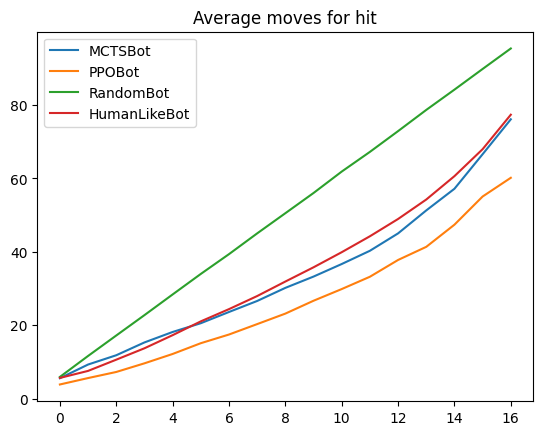

In [13]:
for bot in bots:
    plt.plot(bot_test_dict[bot.__name__]["avg_moves_for_hit"], label=bot.__name__)
    plt.title("Average moves for hit")
    plt.legend()

In [14]:
#Bot vs Bots

for bot in bots:
    #play every bot that is next in the list
    for bot2 in bots[bots.index(bot)+1:]:
        print("Playing", bot.__name__, "vs", bot2.__name__)
        n = 1000
        if bot == MCTSBot or bot2 == MCTSBot:
            n = 100
        print(bot.__name__, "vs", bot2.__name__)
        results = play_bots(bot, bot2, n=n)
        print(bot.__name__,"wins", results["bot1_wins"], results["bot1_wins"]/n)
        print(bot2.__name__,"wins", results["bot2_wins"], results["bot2_wins"]/n)
        print(bot.__name__, "avg moves", results["bot1_win_avg_moves"])
        print(bot2.__name__, "avg moves", results["bot2_win_avg_moves"])
        print("-----------------")

Playing MCTSBot vs PPOBot
MCTSBot vs PPOBot


  0%|          | 0/100 [00:00<?, ?it/s]/Users/user/Documents_stuff/Ashoka/monsoon24-courses/AI/project/final-project-bot-tleship/torch_ppo_stuff/src/ppo/PPO.py:262: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues re

MCTSBot wins 30 0.3
PPOBot wins 70 0.7
MCTSBot avg moves 59.03333333333333
PPOBot avg moves 57.642857142857146
-----------------
Playing MCTSBot vs RandomBot
MCTSBot vs RandomBot


  0%|          | 0/100 [00:05<?, ?it/s]


KeyboardInterrupt: 